In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [115]:
data = load_diabetes()

In [116]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [117]:
x = data.data
y = data.target

x.shape , y.shape

((442, 10), (442,))

In [118]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [119]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [120]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.95,random_state = 2)

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 10)
(420, 10)
(22,)
(420,)


In [122]:
reg = LinearRegression()
reg.fit(x_train , y_train)
y_pred = reg.predict(x_test)

In [123]:
print(reg.coef_)
print(reg.intercept_)

[ -38.12766069 -482.74471062  676.77057587  258.60586477  486.49775448
 -783.70631576 -293.6755225   610.08300319  500.15270782 -352.27765729]
168.01753286000863


In [124]:
print('r2 score : ', r2_score(y_test , y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test , y_pred)))

r2 score :  0.3266942919438215
RMSE :  63.14230620768402


# Ridge Ragularization

In [125]:
from sklearn.linear_model import Ridge

ridge = Ridge (alpha = 0.1)
ridge.fit(x_train , y_train)

Ridge(alpha=0.1)

In [126]:
y_pred2 = ridge.predict(x_test)

In [127]:
print(ridge.coef_)
print(ridge.intercept_)

[  62.6982623  -104.87069121  230.41169355  150.34051744   50.97834098
   35.91855295  -88.55347669  128.41686555  155.2929538    80.19573733]
166.11545764690516


In [128]:
print("R2 score",r2_score(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

R2 score 0.34081137341510526
RMSE 62.47685284640195


alpha increasing accuracy is decreasing  
alpha decresing accuracy is increasing (very slow in this dataset) 32 to 34

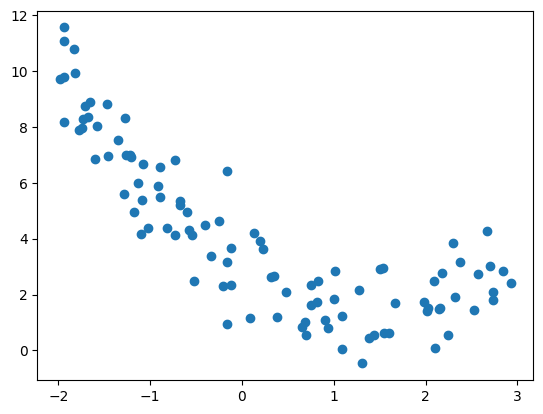

In [129]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

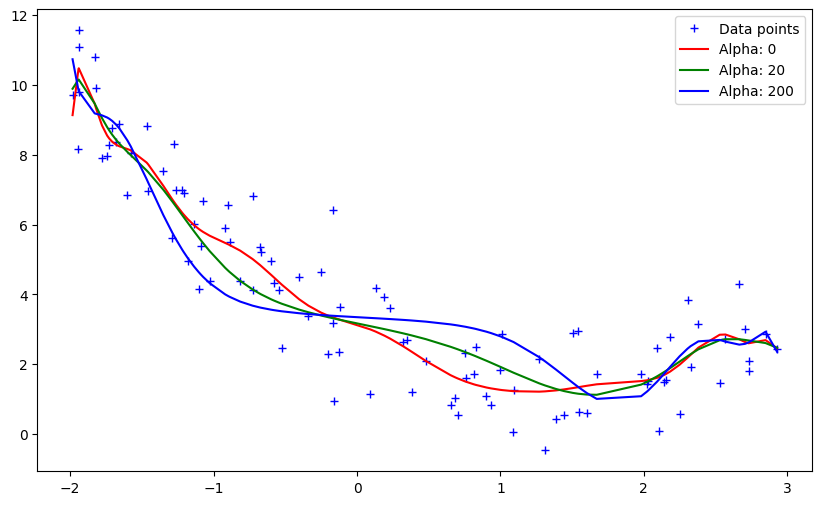

In [130]:
# donot try to understand the code , just ignore watch graph
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Data points')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

`aplha 0 :` --> is underfitting  
`alpha 200 :` --> is overfitting  


`aplha 20 :` --> is looks optimum value